# Introduction

## Load and Check Data

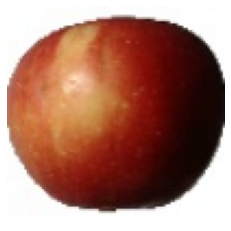

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
from glob import glob

train_path = "Training/"
test_path = "Test/"


image_path = train_path + "Apple Braeburn/0_100.jpg"
img = load_img(image_path)
img_array = img_to_array(img)
plt.imshow(img)
plt.axis("off")
plt.show()

In [40]:
print(img_array.shape)

(100, 100, 3)


In [48]:
className = glob(train_path + '/*')
numberOfClass = len(className)
print("Number Of Class:" , numberOfClass)

Number Of Class: 131


## CNN Model

In [52]:
model = Sequential()
model.add(Conv2D(32, (3,3),input_shape = img_array.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass))
model.add(Activation("softmax"))

model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

batch_size = 32

## Data Generation

In [56]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                   shear_range=0.3,
                   horizontal_flip=True,
                   zoom_range=0.3)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_array.shape[:2],
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=img_array.shape[:2],
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical")


Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [57]:
history = model.fit(
    train_generator,
    steps_per_epoch = 1600 // batch_size,
    epochs=100,
    validation_data=test_generator,
    validation_steps=800 // batch_size
)


Epoch 1/100
50/50 [==============================] - 22s 434ms/step - loss: 4.7958 - accuracy: 0.0200 - val_loss: 4.4097 - val_accuracy: 0.0562
Epoch 2/100
50/50 [==============================] - 21s 416ms/step - loss: 4.1037 - accuracy: 0.0650 - val_loss: 3.9172 - val_accuracy: 0.0787
Epoch 3/100
50/50 [==============================] - 21s 409ms/step - loss: 3.5251 - accuracy: 0.1369 - val_loss: 2.8474 - val_accuracy: 0.2612
Epoch 4/100
50/50 [==============================] - 21s 412ms/step - loss: 2.9446 - accuracy: 0.2256 - val_loss: 2.3597 - val_accuracy: 0.3462
Epoch 5/100
50/50 [==============================] - 18s 366ms/step - loss: 2.4867 - accuracy: 0.3119 - val_loss: 2.0559 - val_accuracy: 0.4200
Epoch 6/100
50/50 [==============================] - 18s 364ms/step - loss: 2.1501 - accuracy: 0.3725 - val_loss: 1.8404 - val_accuracy: 0.4625
Epoch 7/100
50/50 [==============================] - 18s 360ms/step - loss: 1.8453 - accuracy: 0.4538 - val_loss: 1.1533 - val_accuracy:

## Model Evaluation

In [58]:
model.save_weights("cnn_fruit_model.h5")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


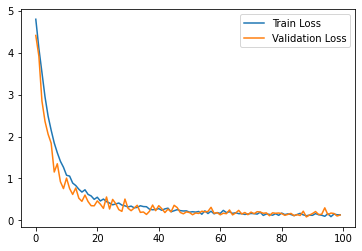

In [59]:
print(history.history.keys())
plt.plot(history.history["loss"], label = "Train Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

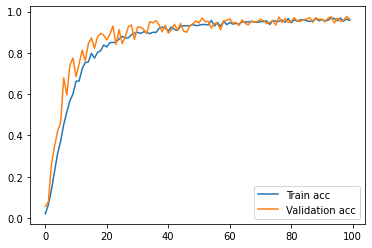

In [66]:
plt.plot(history.history["accuracy"], label = "Train acc")
plt.plot(history.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

In [67]:
import json 
with open("cnn_fruit_hist.json","w") as f:
    json.dump(history.history, f)

In [68]:
import codecs
with codecs.open("cnn_fruit_hist.json","r",encoding="utf-8") as f:
    h = json.loads(f.read())